# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0
)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and check the
generalization performance on the testing set in terms of mean absolute error.

In [2]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

rf_tree = RandomForestRegressor(
    n_estimators=3
)
#rf_tree.get_params()

rf_tree.fit(data_train, target_train)


scores_random_forest = mean_absolute_error(rf_tree.predict(data_train), target_train)
print(
    "Random forest regressor mean abs error on train dataset: "
    f"{scores_random_forest:.3f} "
)

scores_random_forest = mean_absolute_error(rf_tree.predict(data_test), target_test)

print(
    "Random forest regressor mean abs error on test dataset: "
    f"{scores_random_forest:.3f} "
)



Random forest regressor mean abs error on train dataset: 268.561 
Random forest regressor mean abs error on test dataset: 374.807 


We now aim to plot the predictions from the individual trees in the forest.
For that purpose you have to create first a new dataset containing evenly
spaced values for the flipper length over the interval between 170 mm and 230
mm.

In [8]:
# Write your code here.

import numpy as np

x_min = 170
x_max = 230
fake_data = pd.DataFrame(
        np.linspace(x_max, x_min, num=200), columns=[feature_name]
    )



The trees contained in the forest that you created can be accessed with the
attribute `estimators_`. Use them to predict the body mass corresponding to
the values in this newly created dataset. Similarly find the predictions of
the random forest in this dataset.

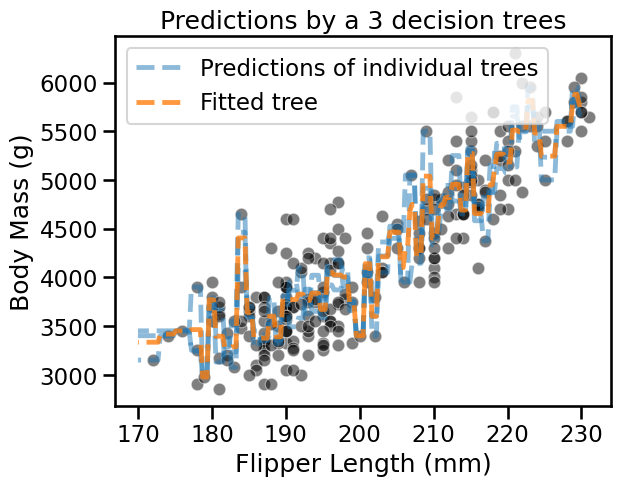

In [7]:
# Write your code here.

import matplotlib.pyplot as plt
import seaborn as sns

y_pred = rf_tree.predict(fake_data)


sns.scatterplot(
    x=data_train[feature_name], y=target_train, color="black", alpha=0.5
)

for tree_idx, tree in enumerate(rf_tree.estimators_):
    label = "Predictions of individual trees" if tree_idx == 0 else None
    # we convert `data_test` into a NumPy array to avoid a warning raised in scikit-learn
    tree_pred = tree.predict(fake_data.to_numpy())
    plt.plot(
        fake_data[feature_name],
        tree_pred,
        linestyle="--",
        alpha=0.5,
        color="tab:blue",
        label=label,
    )

plt.plot(
    fake_data[feature_name], y_pred, 
    label="Fitted tree",
    linestyle="--",
    alpha=0.8,
    color="tab:orange",
)
plt.legend()
_ = plt.title("Predictions by a 3 decision trees")

Now make a plot that displays:
- the whole `data` using a scatter plot;
- the decision of each individual tree;
- the decision of the random forest.

In [5]:
# Write your code here.